In [30]:
import warnings
warnings.filterwarningsngs('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
train=pd.read_csv('./data/train_v9rqX0R.csv')
test = pd.read_csv('./data/test_AbJTz2l.csv')
train.shape, test.shape

((8523, 12), (5681, 11))

In [32]:
df = pd.concat([train, test], axis=0)
df.reset_index(drop=True, inplace=True)
df.shape

(14204, 12)

In [33]:
df.tail()

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
14199           FDB58         10.5          Regular         0.013496   
14200           FDD47          7.6          Regular         0.142991   
14201           NCO17         10.0          Low Fat         0.073529   
14202           FDJ26         15.3          Regular         0.000000   
14203           FDU37          9.5          Regular         0.104720   

                Item_Type  Item_MRP Outlet_Identifier  \
14199         Snack Foods  141.3154            OUT046   
14200       Starchy Foods  169.1448            OUT018   
14201  Health and Hygiene  118.7440            OUT045   
14202              Canned  214.6218            OUT017   
14203              Canned   79.7960            OUT045   

       Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
14199                       1997       Small               Tier 1   
14200                       2009      Medium               Tier 3   
14201                       2002         NaN               Tier 2   
14202                       2007         NaN               Tier 2   
14203                       2002         NaN               Tier 2   

             Outlet_Type  Item_Outlet_Sales  
14199  Supermarket Type1                NaN  
14200  Supermarket Type2                NaN  
14201  Supermarket Type1                NaN  
14202  Supermarket Type1                NaN  
14203  Supermarket Type1                NaN

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                11765 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                10188 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 1.3+ MB


In [35]:
df.drop(['Item_Weight','Outlet_Establishment_Year','Outlet_Size','Outlet_Location_Type','Outlet_Type'],axis=1,inplace=True)

In [36]:
df.Item_Fat_Content=df.Item_Fat_Content.replace('LF','Low Fat')
df.Item_Fat_Content=df.Item_Fat_Content.replace('reg','Regular')
df.Item_Fat_Content=df.Item_Fat_Content.replace('low fat','Low Fat')

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Item_Identifier    14204 non-null  object 
 1   Item_Fat_Content   14204 non-null  object 
 2   Item_Visibility    14204 non-null  float64
 3   Item_Type          14204 non-null  object 
 4   Item_MRP           14204 non-null  float64
 5   Outlet_Identifier  14204 non-null  object 
 6   Item_Outlet_Sales  8523 non-null   float64
dtypes: float64(3), object(4)
memory usage: 776.9+ KB


In [38]:
df.drop_duplicates(inplace=True)
df.shape

(14204, 7)

In [39]:
feature = df.iloc[:,:-1]
num_feat = feature[['Item_Visibility','Item_MRP']]
obj_feat = feature[['Item_Identifier','Item_Fat_Content','Item_Type','Outlet_Identifier']]

In [40]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(num_feat)
scaled = scaler.transform(num_feat)

num_columns = ['Item_Visibility','Item_MRP']
df_scaled = pd.DataFrame(scaled, columns=num_columns)
df_scaled.head()

Item_Visibility  Item_MRP
0        -0.969852  1.752511
1        -0.907063 -1.493696
2        -0.956000  0.009874
3        -1.281712  0.661838
4        -1.281712 -1.403623

In [41]:
# one-hot
df_ohe = pd.get_dummies(obj_feat)

In [42]:
df_scaled.shape, df_ohe.shape

((14204, 2), (14204, 1587))

In [43]:
data = pd.concat([df_scaled, df_ohe], axis=1)
data.shape

(14204, 1589)

<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Density'>

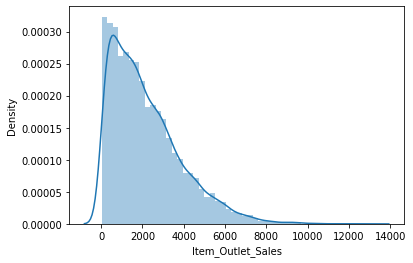

In [44]:
sns.distplot(df['Item_Outlet_Sales'])

In [45]:
df['Item_Outlet_Sales'] = np.log1p(df['Item_Outlet_Sales'])

<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Density'>

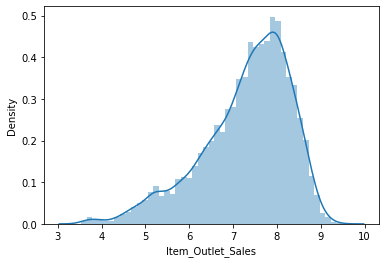

In [46]:
sns.distplot(df['Item_Outlet_Sales'])

In [47]:
X_train = data.iloc[:8523]
y_train = df['Item_Outlet_Sales'][:8523]

X_test = data.iloc[8523:]

X_train.shape, y_train.shape, X_test.shape

((8523, 1589), (8523,), (5681, 1589))

In [48]:
train = pd.concat([X_train, y_train], axis=1)
train.shape

(8523, 1590)

In [49]:
from pycaret.regression import *

In [50]:
model = setup(train, target='Item_Outlet_Sales', train_size = 0.8)

In [51]:
best5 = compare_models(fold = 5, sort = 'RMSE', n_select = 5, exclude = ['br'])

In [ ]:
tuned_gbr = tune_model(gbr, optimize = 'RMSE', n_iter = 10)

In [52]:
train_X = X_train[:1025]
test_X = X_train[1025:]
train_y = y_train[:1025]
test_y = y_train[1025:]

In [53]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

gbr=GradientBoostingRegressor()
gbr.fit(train_X,train_y)
p=gbr.predict(test_X)
gb_score=mean_squared_error(test_y,p)
gb_score=np.sqrt(gb_score)
gb_score

0.5322218078576042

In [54]:
from sklearn.model_selection import cross_val_score

gb=GradientBoostingRegressor()
score=cross_val_score(gb,train_X,train_y,cv=10,scoring='neg_mean_squared_error')
gb_score_cross=np.sqrt(-score)
np.mean(gb_score_cross),np.std(gb_score_cross)

(0.5518365311645893, 0.04164246225750361)

In [55]:
predict=gbr.predict(X_test)
predict.shape

(5681,)

In [56]:
final = np.exp(predict)-1

In [57]:
sample=pd.read_csv('./data/sample_submission_8RXa3c6.csv')
sample.head()

Item_Identifier Outlet_Identifier  Item_Outlet_Sales
0           FDW58            OUT049               1000
1           FDW14            OUT017               1000
2           NCN55            OUT010               1000
3           FDQ58            OUT017               1000
4           FDY38            OUT027               1000

In [58]:
del sample['Item_Outlet_Sales']

In [59]:
df=pd.DataFrame({'Item_Outlet_Sales':final})
corr_ans=pd.concat([sample,df],axis=1)
corr_ans

Item_Identifier Outlet_Identifier  Item_Outlet_Sales
0              FDW58            OUT049        1693.506889
1              FDW14            OUT017        1302.658011
2              NCN55            OUT010         588.754663
3              FDQ58            OUT017        2293.227839
4              FDY38            OUT027        5101.382000
...              ...               ...                ...
5676           FDB58            OUT046        1837.091413
5677           FDD47            OUT018        2261.769727
5678           NCO17            OUT045        1712.967358
5679           FDJ26            OUT017        3288.549259
5680           FDU37            OUT045        1047.746211

[5681 rows x 3 columns]

In [60]:
corr_ans.to_csv('submission2.csv',index=None)